Name: Kaan Canbolat

ID: 151101075

Course: BIL570 /BIL470

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

Read Dataset

In [3]:
iris = pd.read_csv("Iris.csv");


In [4]:
iris= iris.drop(columns="Id");

speciesColumn = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris=iris.replace({'Species':speciesColumn})


Dataset Summary

In [5]:
display(iris);


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#discription of columns
sepalLength= iris["SepalLengthCm"].describe();
sepalWidth= iris["SepalWidthCm"].describe();
petalLenght= iris["PetalLengthCm"].describe();
petalWidth= iris["PetalWidthCm"].describe();
print(sepalLength)
print(sepalWidth)
print(petalLenght)
print(petalWidth)

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


Checking Duplacated Data

In [7]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

Checking Balance

c:\Users\canbo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


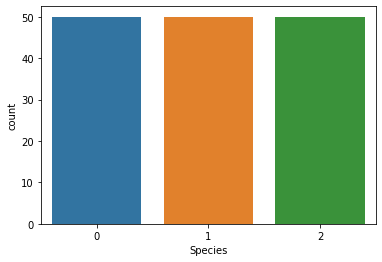

In [8]:
sns.countplot(iris["Species"]);

In [29]:
display(iris.isnull().sum(axis=0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

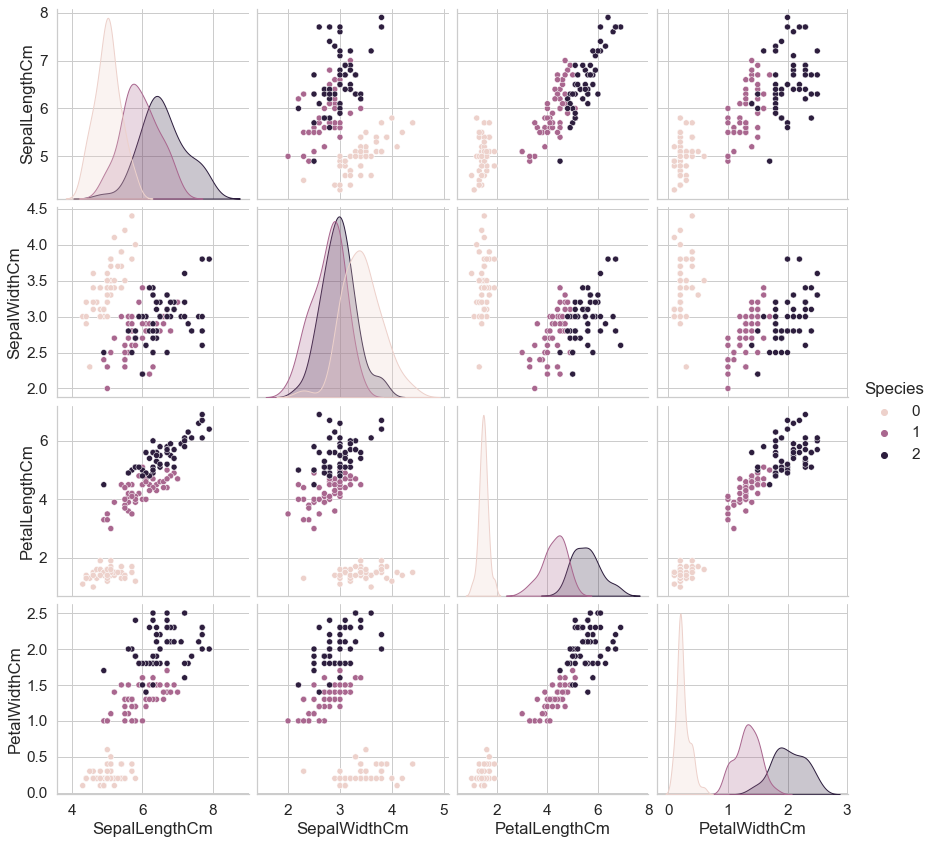

In [31]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="Species",height=3);
plt.show();

Setosa looks more significant than other species. versicolar and virginia looks closer each other than setosa.

# Train the classifier

In [9]:
clf = DecisionTreeClassifier(max_depth=5)


Split dataset to train and test

In [10]:
X=iris.values.tolist();
y=[];
for row in X:
     y.append(int(row[4]));
     del row[4];

    
X=pd.Series(X);
y=pd.Series(y);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);


X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();




### Train The Classifier

In [11]:

clf.fit(X_train_list,y_train_list);


### Predict Class of Test values

In [12]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2]
Prediction
[1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2]
Train Features Expected Classification
[0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1]
Prediction
[0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 

# Results

### Confusion Matrix of Test

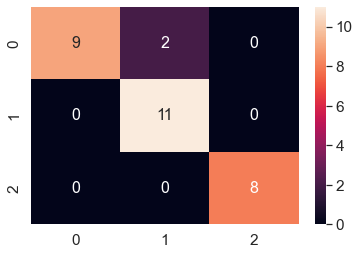

In [14]:
y_pred2= pd.Series(yhat);
y_test2= pd.Series(y_test_list);
mt= metrics.confusion_matrix(y_test2, y_pred2)
df_cm= pd.DataFrame(mt, range(3),range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Confusion Matrix of Train

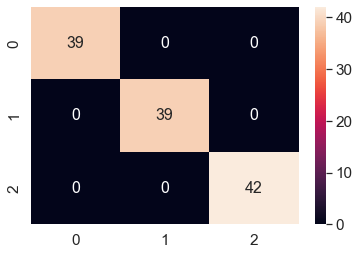

In [16]:
x_pred2= pd.Series(xhat);
x_test2= pd.Series(y_train_list);
mt= metrics.confusion_matrix(x_test2, x_pred2)
df_cm= pd.DataFrame(mt, range(3),range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### F1-Score

In [17]:
f1=metrics.f1_score(y_test2, y_pred2,average='weighted');
print("F1-Score Test:")
print(f1);
f2=metrics.f1_score(x_test2, x_pred2,average='weighted');
print("F1-Score Train:")
print(f2);

F1-Score Test:
0.9327777777777778
F1-Score Train:
1.0


### Accuracy

In [18]:
accuracy = metrics.accuracy_score(y_test2,y_pred2);
print("Accuracy Test")
print(accuracy)
accuracy2 = metrics.accuracy_score(x_test2,x_pred2);
print("Accuracy Train")
print(accuracy2)

Accuracy Test
0.9333333333333333
Accuracy Train
1.0


### Precision

In [19]:
precision=metrics.precision_score(y_test2,y_pred2,average='weighted')
print("Precision Test")
print(precision)
precision2=metrics.precision_score(x_test2,x_pred2,average='weighted')
print("Precision Train")
print(precision2)

Precision Test
0.9435897435897436
Precision Train
1.0


### Recal

In [20]:
recall=metrics.recall_score(y_test2,y_pred2,average='weighted')
print("Recall Test")
print(recall)
recall2=metrics.recall_score(x_test2,x_pred2,average='weighted')
print("Recall Train")
print(recall2)

Recall Test
0.9333333333333333
Recall Train
1.0


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

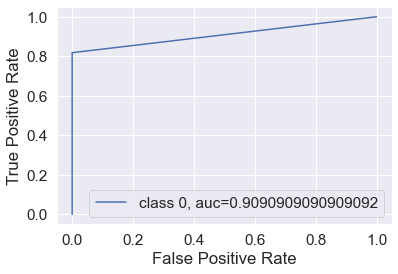

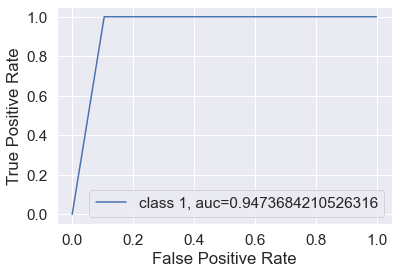

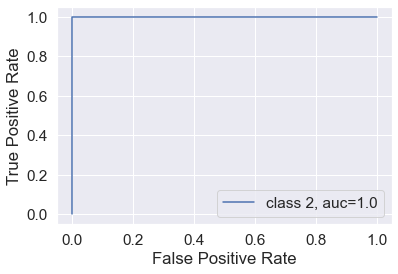

In [27]:
#Test Datası
y_testb= label_binarize(y_test2,classes=[0,1,2]);
y_predprod= label_binarize(y_pred2, classes=[0,1,2]);

fpr,tpr,threshold= metrics.roc_curve(y_testb[:,2],y_predprod[:,2])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 0, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fpr,tpr,threshold= metrics.roc_curve(y_testb[:,1],y_predprod[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 1, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fpr,tpr,threshold= metrics.roc_curve(y_testb[:,0],y_predprod[:,0])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 2, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

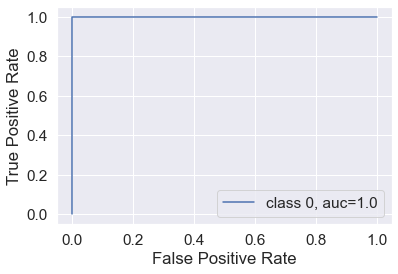

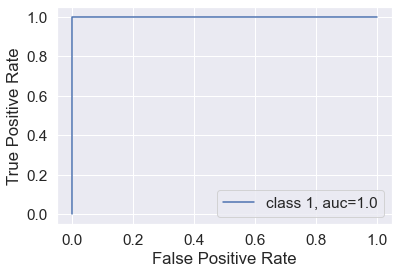

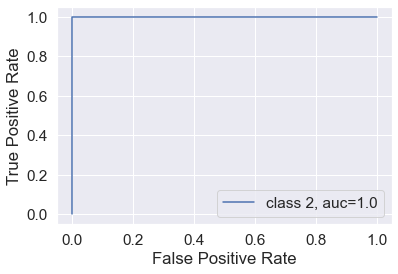

In [28]:
#Train datası
x_testb= label_binarize(x_test2,classes=[0,1,2]);
x_predprod= label_binarize(x_pred2, classes=[0,1,2]);

fpr,tpr,threshold= metrics.roc_curve(x_testb[:,2],x_predprod[:,2])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 0, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fpr,tpr,threshold= metrics.roc_curve(x_testb[:,1],x_predprod[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 1, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fpr,tpr,threshold= metrics.roc_curve(x_testb[:,0],x_predprod[:,0])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="class 2, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()